# IN THIS CODE WHEN LSTM WAS TUNED USING GRID SEARCH CV AND CORRECTED THE ERRORS GIVEN BY INITIAL OPTUNA TUNED XGB MODEL , WE CAN FIND THE MULTIVAIATE HYBRID OPTIMAL MODEL FOR WIND SPEED FORECASTING WITH FOLLOWING ERROR VALUES
#xgb-OPTUNA % lstm-GRID SEARCH
#-- Test Metrics ---
#RMSE: 0.4787
#MSE: 0.2291
#MAE: 0.3563
#MAPE: 9.5244%
#R²: 0.9050

In [ ]:
!pip install scikeras


In [ ]:
import sklearn, scikeras, tensorflow
print("scikit-learn:", sklearn.__version__)
print("scikeras:", scikeras.__version__)
print("tensorflow:", tensorflow.__version__)


scikit-learn: 1.6.1
scikeras: 0.13.0
tensorflow: 2.18.0


In [ ]:
!pip install --force-reinstall --no-cache-dir numpy scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 160.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 216.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found exi

In [ ]:


## Data Set 1
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd



# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd


from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)



from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)
import pandas as pd

# Load data from Google Drive
file_id = "1c5KmcFD1TOsqASqzy0KiYo-7IzgBFuhk"  # Using the new link you provided
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the data
df = pd.read_csv(download_url)

# Backup original DataFrame
df_backup = df.copy()

# Create datetime index
df['Date'] = pd.to_datetime({
    'year': df['YEAR'],
    'month': df['MO'],
    'day': df['DY']
})
df = df.set_index('Date')

# Drop unnecessary columns
df = df.drop(columns=["YEAR", "MO", "DY"])

# Display the DataFrame
print(df.head())



df.columns

df.columns
df
## Data Sets

# 1


df
###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)

# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.5 MB/s eta 0:00:00
            WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26    

when run again uncommtnt efta

In [ ]:
X = df.drop(columns=['WS10M'])  # Features (lagged variables)
y = df['WS10M']  # Target variable (wind speed)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import matplotlib.pyplot as plt

# ============================
# Step 1: Load Data
# ============================
# Assume X is a DataFrame with both numerical and already encoded categorical columns
# Assume y is the target variable (time series)

# Split train-test (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [ ]:
numerical_cols=df.columns
numerical_cols

Index(['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'WS10M'],
      dtype='object')

# WITH BEST PARAMETERS...

In [ ]:
#Best Parameters: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.02938630222446296, 'min_child_weight': 3, 'gamma': 0.21596141821045672, 'subsample': 0.9175077579183483}
#Optuna

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Set all random seeds for full reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Assuming you have your full dataset X, y ready
# Make sure this matches how you split data during Optuna run
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

# Optimal parameters from Optuna with ALL relevant parameters
best_params = {
    'n_estimators': 300,
    'max_depth': 6,
    'learning_rate': 0.02938630222446296,
    'min_child_weight': 3,
    'gamma': 0.21596141821045672,
    'subsample': 0.9175077579183483,
    'random_state': RANDOM_SEED,
    'objective': 'reg:squarederror',
    'colsample_bytree': 1.0,  # Default in Optuna
    'reg_alpha': 0,           # Default in Optuna
    'reg_lambda': 1,          # Default in Optuna
    'seed': RANDOM_SEED       # Additional seed parameter
}

# Initialize and train the model with ALL parameters
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train, verbose=False)

# Make predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, mape, r2

train_mse, train_mae, train_rmse, train_mape, train_r2 = calculate_metrics(y_train, y_train_pred)
test_mse, test_mae, test_rmse, test_mape, test_r2 = calculate_metrics(y_test, y_test_pred)

# Print the evaluation metrics
print("Reproduced Model Performance (should match Optuna):")
print("==================================================")
print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train MAPE: {train_mape:.4f}%, Test MAPE: {test_mape:.4f}%")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

Reproduced Model Performance (should match Optuna):
Train MSE: 0.1564, Test MSE: 0.4352
Train MAE: 0.3073, Test MAE: 0.5139
Train RMSE: 0.3955, Test RMSE: 0.6597
Train MAPE: 8.3910%, Test MAPE: 14.2667%
Train R²: 0.9375, Test R²: 0.8246


# gET THE PREDICTION AND STORE IT IN THE NEW COLUMN

In [ ]:
# 5. Get predictions for the entire dataset
df['xgb_predictions_WS10M'] = best_xgb.predict(X)

# 6. Optional: Save the updated DataFrame
# df.to_csv('data_with_predictions.csv', index=False)

# 7. Show the first few rows with predictions
print(df[['WS10M', 'xgb_predictions_WS10M']].head())

            WS10M  xgb_predictions_WS10M
Date                                    
2013-01-03   4.75               4.515190
2013-01-04   5.74               5.659385
2013-01-05   5.79               5.869278
2013-01-06   4.52               5.049080
2013-01-07   4.66               4.724025


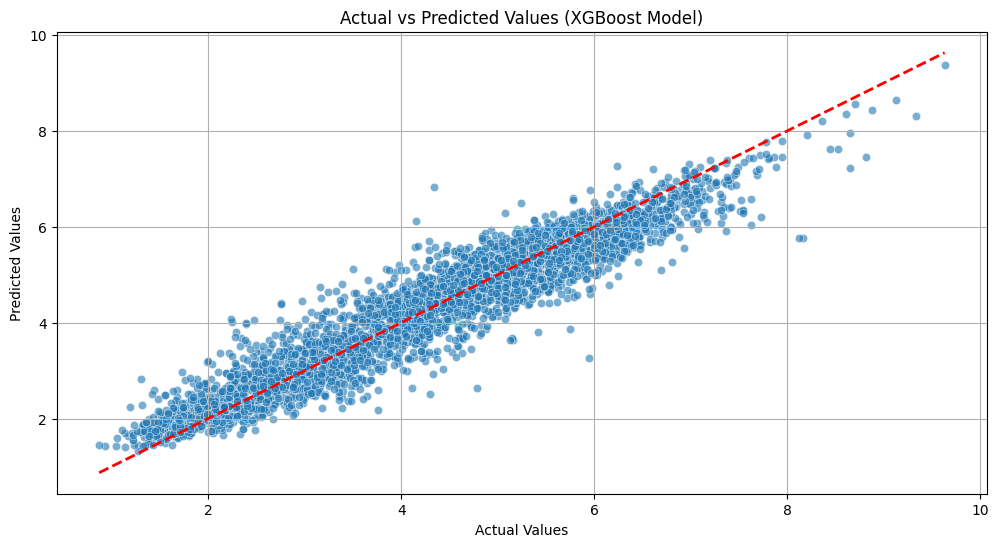

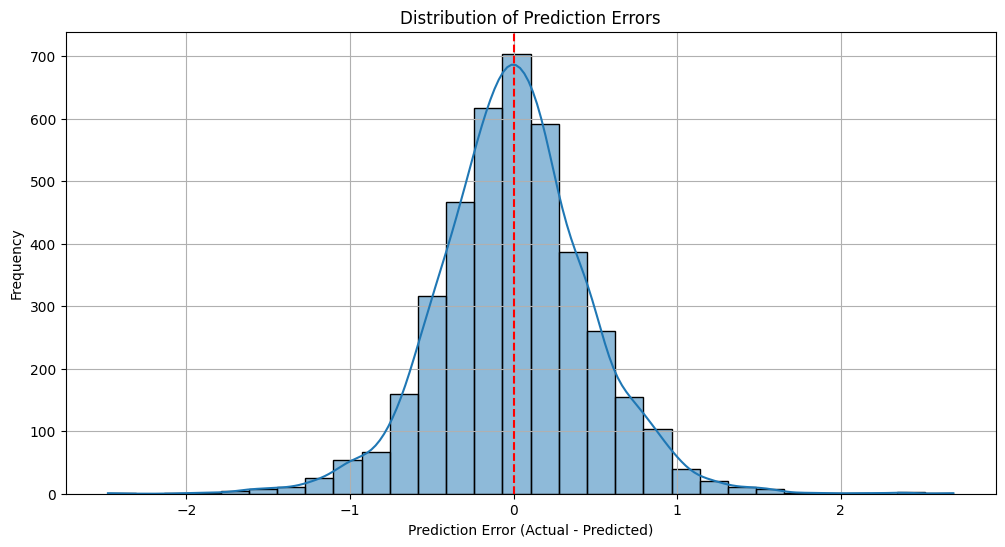


DataFrame with Predictions and Errors:
            WS10M  xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M
Date                                                          
2013-01-03   4.75               4.515190              0.234810
2013-01-04   5.74               5.659385              0.080615
2013-01-05   5.79               5.869278             -0.079278
2013-01-06   4.52               5.049080             -0.529080
2013-01-07   4.66               4.724025             -0.064025


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate prediction errors (Actual - Predicted)
df['ERROR_XGB_PRED_WS10M'] = df['WS10M'] - df['xgb_predictions_WS10M']

# 2. Plot actual vs predicted values
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted
sns.scatterplot(x='WS10M', y='xgb_predictions_WS10M', data=df, alpha=0.6)
plt.plot([df['WS10M'].min(), df['WS10M'].max()],
         [df['WS10M'].min(), df['WS10M'].max()],
         'r--', linewidth=2)  # Perfect prediction line

plt.title('Actual vs Predicted Values (XGBoost Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# 3. Plot error distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['ERROR_XGB_PRED_WS10M'], kde=True, bins=30)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--')  # Zero error line
plt.grid(True)
plt.show()


# 5. Show dataframe with new error column
print("\nDataFrame with Predictions and Errors:")
print(df[['WS10M', 'xgb_predictions_WS10M', 'ERROR_XGB_PRED_WS10M']].head())

In [ ]:
df

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  
Date                                                     
2013-01-03               4.515190              0.234810  
2013-01-04               5.659385              0.080615  
2013-01-05               5.869278             -0.079278  
2013-01-06               5.049080             -0.529080  
2013-01-07               4.724025             -0.064025  
...                           ...                   ...  
2023-12-27               6.052691              0.377309  
2023-12-28               4.319921             -0.389921  
2023-12-29               3.165385             -0.575385  
2023-12-30               3.867595              0.722405  
2023-12-31               4.738072              0.341928  

[4015 rows x 16 columns]

In [ ]:
# Save the DataFrame with predictions and errors to CSV
df.to_csv('xgb_predictions_and_errors.csv', index=True)

# RESIDUAL CORRECTION MODEL

In [ ]:
df_backup=df.copy()
df_backup

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  
Date                                                     
2013-01-03               4.515190              0.234810  
2013-01-04               5.659385              0.080615  
2013-01-05               5.869278             -0.079278  
2013-01-06               5.049080             -0.529080  
2013-01-07               4.724025             -0.064025  
...                           ...                   ...  
2023-12-27               6.052691              0.377309  
2023-12-28               4.319921             -0.389921  
2023-12-29               3.165385             -0.575385  
2023-12-30               3.867595              0.722405  
2023-12-31               4.738072              0.341928  

[4015 rows x 16 columns]

In [ ]:
df.columns

Index(['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'WS10M',
       'xgb_predictions_WS10M', 'ERROR_XGB_PRED_WS10M'],
      dtype='object')

# LSTM

In [ ]:
#read csv
df=pd.read_csv('xgb_predictions_and_errors.csv')
df

df = df.set_index('Date')
df
df_backup=df.copy()


df=df[['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'ERROR_XGB_PRED_WS10M']]

df

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  ERROR_XGB_PRED_WS10M  
Date                                                                       
2013-01-03     28.38            1010.4          8.0              0.234810  
2013-01-04     27.58            1011.0          8.0              0.080615  
2013-01-05     26.16            1010.1          8.0             -0.079278  
2013-01-06     27.75            1007.5          7.0             -0.529080  
2013-01-07     26.70            1008.2          8.0             -0.064025  
...              ...               ...          ...                   ...  
2023-12-27     30.35            1011.6          5.0              0.377309  
2023-12-28     29.37            1011.0          7.0             -0.389921  
2023-12-29     29.30            1010.9          7.0             -0.575385  
2023-12-30     29.54            1011.4          6.0              0.722405  
2023-12-31     30.03            1010.9          6.0              0.341928  

[4015 rows x 14 columns]

In [ ]:


## Data Set 1
# INSTALLING **PACKAGES**


!pip install statsmodels

! pip install optuna

!pip install tabulate

# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



# LOADING THE DATA SET
#https://drive.google.com/file/d/1Z_KsoIumw-fvivVombIoWuRo0LOe2nCb/view?usp=sharing
#https://drive.google.com/file/d/1aD1PXfwEEZ_F2lQgxuPfj-TVbxQ6NajK/view?usp=sharing
import gdown
import pandas as pd



# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read Xlsx file
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np  # Ensure numpy is imported
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd


from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)



from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error, r2_score)
import pandas as pd



df
###########################################################################################
# Define the list of variables to select

X = df.drop(columns=['ERROR_XGB_PRED_WS10M'])
# Select only those columns from X
 # Features (lagged variables)
y = df['ERROR_XGB_PRED_WS10M']  # Target variable (wind speed)

# Define the split index
split_index = int(len(X) * 0.8)  # 80% for training, 20% for testing

# Training set
X_train = X[:split_index]
y_train = y[:split_index]

# Testing set
X_test = X[split_index:]
y_test = y[split_index:]

numerical_cols=df.columns
numerical_cols

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())
print("X_test:")
print(X_test.head())
print("y_test:")
print(y_test.head())

# Print the shapes of the datasets
print("\nShapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train:
            WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88 

In [ ]:
# Function to calculate evaluation metrics
def evaluate(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2


# Define evaluation metric
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

In [ ]:
X_test

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2021-10-20        3.92  84.94     25.38  14.81 -0.914254                0.07   
2021-10-21        2.82  86.10     25.29  33.26 -0.930418                0.01   
2021-10-22        2.79  85.41     24.59   9.53 -0.810042                0.07   
2021-10-23        2.72  85.24     24.52   9.21 -0.570714                0.10   
2021-10-24        4.30  85.16     24.15  10.47 -0.979223               -0.03   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2021-10-20      27.9 -0.405142    83.84                                  0   
2021-10-21      26.7 -0.366501    84.94                                  0   
2021-10-22      28.1 -0.586372    86.10                                  0   
2021-10-23      28.0 -0.821149    85.41                                  0   
2021-10-24      26.6 -0.202787    85.24                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  
Date                                                 
2021-10-20     28.73            1010.8          7.0  
2021-10-21     28.72            1011.5          7.0  
2021-10-22     28.80            1011.6          6.0  
2021-10-23     28.17            1012.0          4.0  
2021-10-24     27.91            1012.9          7.0  
...              ...               ...          ...  
2023-12-27     30.35            1011.6          5.0  
2023-12-28     29.37            1011.0          7.0  
2023-12-29     29.30            1010.9          7.0  
2023-12-30     29.54            1011.4          6.0  
2023-12-31     30.03            1010.9          6.0  

[803 rows x 13 columns]

In [ ]:
X_train

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2021-10-15        5.64  87.48     25.75   2.00 -0.865151               -0.21   
2021-10-16        5.84  86.39     25.49   6.33 -0.758134                0.05   
2021-10-17        6.93  87.80     25.93   3.24 -0.915663                0.16   
2021-10-18        6.84  86.68     25.63   3.01 -0.995884                0.18   
2021-10-19        6.13  83.84     24.84   4.97 -0.971549                0.15   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2021-10-15      29.4 -0.501511    87.81                                  0   
2021-10-16      28.1 -0.652098    87.48                                  0   
2021-10-17      28.3 -0.401948    86.39                                  0   
2021-10-18      28.5 -0.090633    87.80                                  0   
2021-10-19      28.4 -0.236838    86.68                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  
Date                                                 
2013-01-03     28.38            1010.4          8.0  
2013-01-04     27.58            1011.0          8.0  
2013-01-05     26.16            1010.1          8.0  
2013-01-06     27.75            1007.5          7.0  
2013-01-07     26.70            1008.2          8.0  
...              ...               ...          ...  
2021-10-15     28.61            1007.1          6.0  
2021-10-16     28.72            1005.3          6.0  
2021-10-17     27.85            1006.1          6.0  
2021-10-18     28.58            1008.2          5.0  
2021-10-19     28.49            1010.1          6.0  

[3212 rows x 13 columns]

In [ ]:
X_test

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2021-10-20        3.92  84.94     25.38  14.81 -0.914254                0.07   
2021-10-21        2.82  86.10     25.29  33.26 -0.930418                0.01   
2021-10-22        2.79  85.41     24.59   9.53 -0.810042                0.07   
2021-10-23        2.72  85.24     24.52   9.21 -0.570714                0.10   
2021-10-24        4.30  85.16     24.15  10.47 -0.979223               -0.03   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2021-10-20      27.9 -0.405142    83.84                                  0   
2021-10-21      26.7 -0.366501    84.94                                  0   
2021-10-22      28.1 -0.586372    86.10                                  0   
2021-10-23      28.0 -0.821149    85.41                                  0   
2021-10-24      26.6 -0.202787    85.24                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  
Date                                                 
2021-10-20     28.73            1010.8          7.0  
2021-10-21     28.72            1011.5          7.0  
2021-10-22     28.80            1011.6          6.0  
2021-10-23     28.17            1012.0          4.0  
2021-10-24     27.91            1012.9          7.0  
...              ...               ...          ...  
2023-12-27     30.35            1011.6          5.0  
2023-12-28     29.37            1011.0          7.0  
2023-12-29     29.30            1010.9          7.0  
2023-12-30     29.54            1011.4          6.0  
2023-12-31     30.03            1010.9          6.0  

[803 rows x 13 columns]


# LSTM

## Original

In [ ]:
df_backup

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  
Date                                                     
2013-01-03               4.515190              0.234810  
2013-01-04               5.659385              0.080615  
2013-01-05               5.869278             -0.079278  
2013-01-06               5.049080             -0.529080  
2013-01-07               4.724025             -0.064025  
...                           ...                   ...  
2023-12-27               6.052691              0.377309  
2023-12-28               4.319922             -0.389921  
2023-12-29               3.165386             -0.575385  
2023-12-30               3.867595              0.722405  
2023-12-31               4.738072              0.341928  

[4015 rows x 16 columns]

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.2160 - val_loss: 0.2435
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2105 - val_loss: 0.2435
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2091 - val_loss: 0.2437
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2083 - val_loss: 0.2439
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2076 - val_loss: 0.2440
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2071 - val_loss: 0.2441
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2067 - val_loss: 0.2442
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2063 - val_loss: 0.2443
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2059 - val_loss: 0.2443
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2056 - val_loss: 0.2444
Epoch 11/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2053 - val_loss: 0.2444
Epoch 12/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss

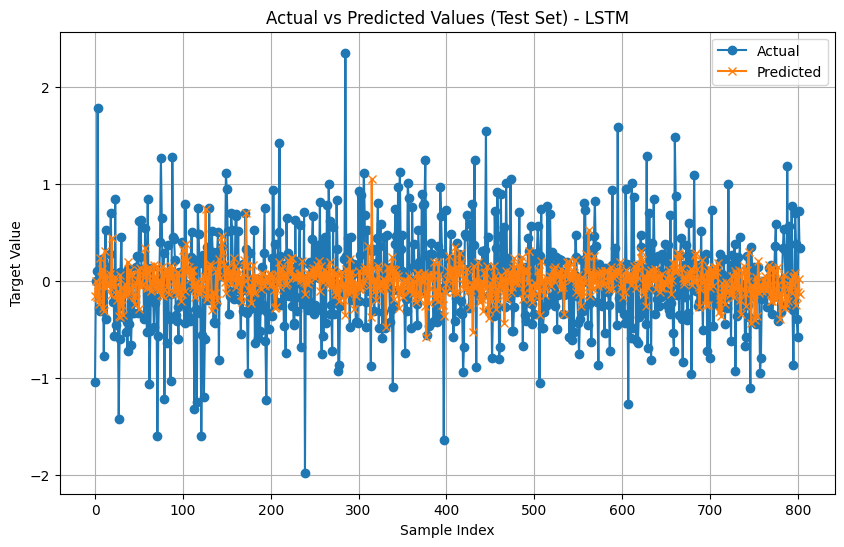

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set seed for reproducibility
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

# --- Data Scaling (Critical Step) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Reshape for LSTM: (samples, timesteps=1, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)  # Shape: (n_samples, 1, n_features)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Targets as numpy arrays (ensure they are 1D)
y_train_lstm = y_train.values.flatten()
y_test_lstm = y_test.values.flatten()

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))  # output layer for regression

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Predict
y_train_pred_lstm = model.predict(X_train_lstm).flatten()
y_test_pred_lstm = model.predict(X_test_lstm).flatten()


print("\n--- LSTM Evaluation ---")
evaluate(y_train_lstm, y_train_pred_lstm, label="Train (LSTM)")
evaluate(y_test_lstm, y_test_pred_lstm, label="Test (LSTM)")

# Comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': y_test_lstm,
    'Predicted': y_test_pred_lstm
})

print(comparison_df.head(20))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label='Actual', marker='o')
plt.plot(y_test_pred_lstm, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (Test Set) - LSTM')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
            predicted_residuals_lstm_original
Date                                         
2013-01-03                           0.086010
2013-01-04                           0.159215
2013-01-05                           0.097302
2013-01-06                          -0.081384
2013-01-07                          -0.083602
            predicted_residuals_lstm_original
Date                                         
2013-01-03                           0.086010
2013-01-04                           0.159215
2013-01-05                           0.097302
2013-01-06                          -0.081384
2013-01-07                          -0.083602

--- Train Metrics ---
RMSE: 0.4343
MSE: 0.1886
MAE: 0.3313
MAPE: 9.1075%
R²: 0.9251

--- Test Metrics ---
RMSE: 0.4956
MSE: 0.2456
MAE: 0.3744
MAPE: 9.9577%
R²: 0.8981


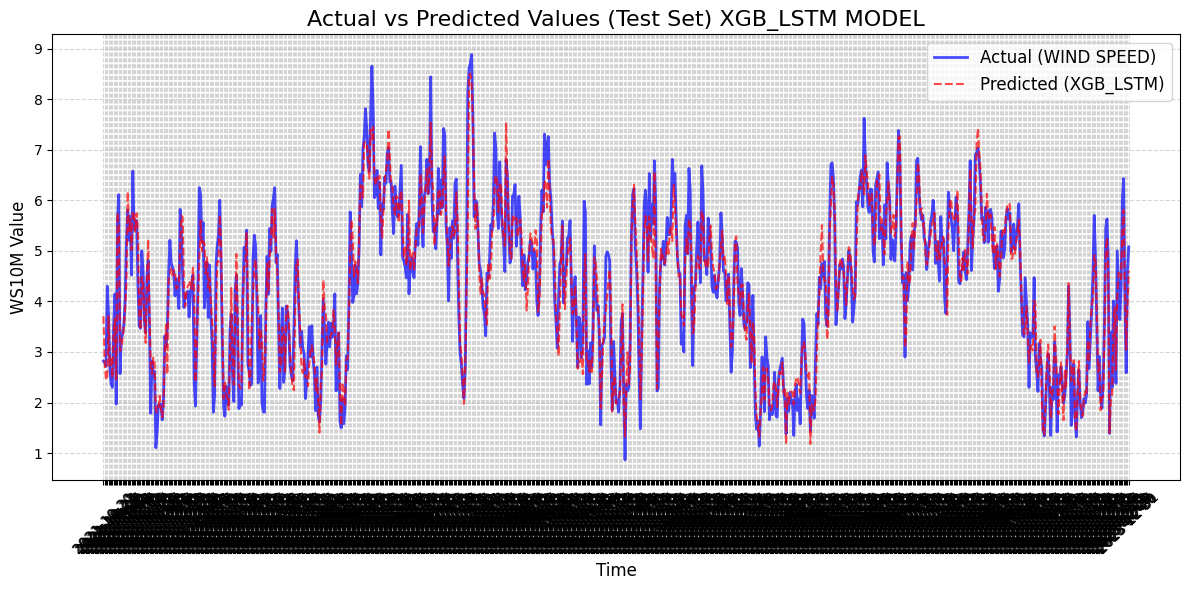

In [ ]:
df_backup

# 2. Scale the full dataset using the same scaler that was fit on training data
X_full_scaled = scaler.transform(X)  # Important: use transform(), not fit_transform()

# 3. Reshape for LSTM
X_full_lstm = np.expand_dims(X_full_scaled, axis=1)  # Shape: (n_samples, 1, n_features)

# 4. Predict residuals using the trained LSTM model
full_pred_residuals_ORIGINAL = model.predict(X_full_lstm).flatten()

# 5. Create a new column in your original dataframe
# (Assuming you have a main dataframe called 'df' that contains all your data)
df['predicted_residuals_lstm_original'] = full_pred_residuals_ORIGINAL

# 6. Verify the results
print(df[['predicted_residuals_lstm_original']].head())
df
df_backup['predicted_residuals_lstm_original'] = full_pred_residuals_ORIGINAL

# 6. Verify the results
print(df_backup[['predicted_residuals_lstm_original']].head())
df_backup

# XGB_LSTM = xgb_predictions_WS10M + predicted_residuals_lstm
# Add the hybrid predictions (XGBoost + LSTM residuals) to df_backup
df_backup['XGB_LSTM_Original'] = df_backup['xgb_predictions_WS10M'] + df_backup['predicted_residuals_lstm_original']
df_backup
# Calculate split index (80% for training)
split_idx = int(0.8 * len(df_backup))

# Split into train and test sets
train_df = df_backup.iloc[:split_idx].copy()
test_df = df_backup.iloc[split_idx:].copy()
train_df
test_df
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_performance(y_true, y_pred, set_name="Dataset"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {set_name} Metrics ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R²: {r2:.4f}")

    return {
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae,
        'MAPE': mape,
        'R²': r2
    }
# Evaluate on training set
train_metrics = evaluate_performance(
    train_df['WS10M'],
    train_df['XGB_LSTM_Original'],
    set_name="Train"
)

# Evaluate on test set
test_metrics = evaluate_performance(
    test_df['WS10M'],
    test_df['XGB_LSTM_Original'],
    set_name="Test"
)
import matplotlib.pyplot as plt

# Ensure test_df has a datetime index (if applicable)
# If your data has a datetime column (e.g., 'date'), set it as index:
# test_df = test_df.set_index('date')

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual (WIND SPEED)',
    color='blue',
    alpha=0.7,
    linewidth=2
)

# Plot predicted values (XGB_LSTM)
plt.plot(
    test_df.index,
    test_df['XGB_LSTM_Original'],
    label='Predicted (XGB_LSTM)',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1.5
)

# Customize the plot
plt.title('Actual vs Predicted Values (Test Set) XGB_LSTM MODEL', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('WS10M Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels if dates are crowded
plt.xticks(rotation=45)

# Tight layout to avoid label cutoff
plt.tight_layout()
plt.show()
df_backup.columns
df_backup
xgb_lstm_original_df = df_backup[['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'WS10M','XGB_LSTM_Original']]
xgb_lstm_original_df
#save this xgb_lstm_df to csv
xgb_lstm_original_df.to_csv('xgb_lstm_df_1.csv', index=False)

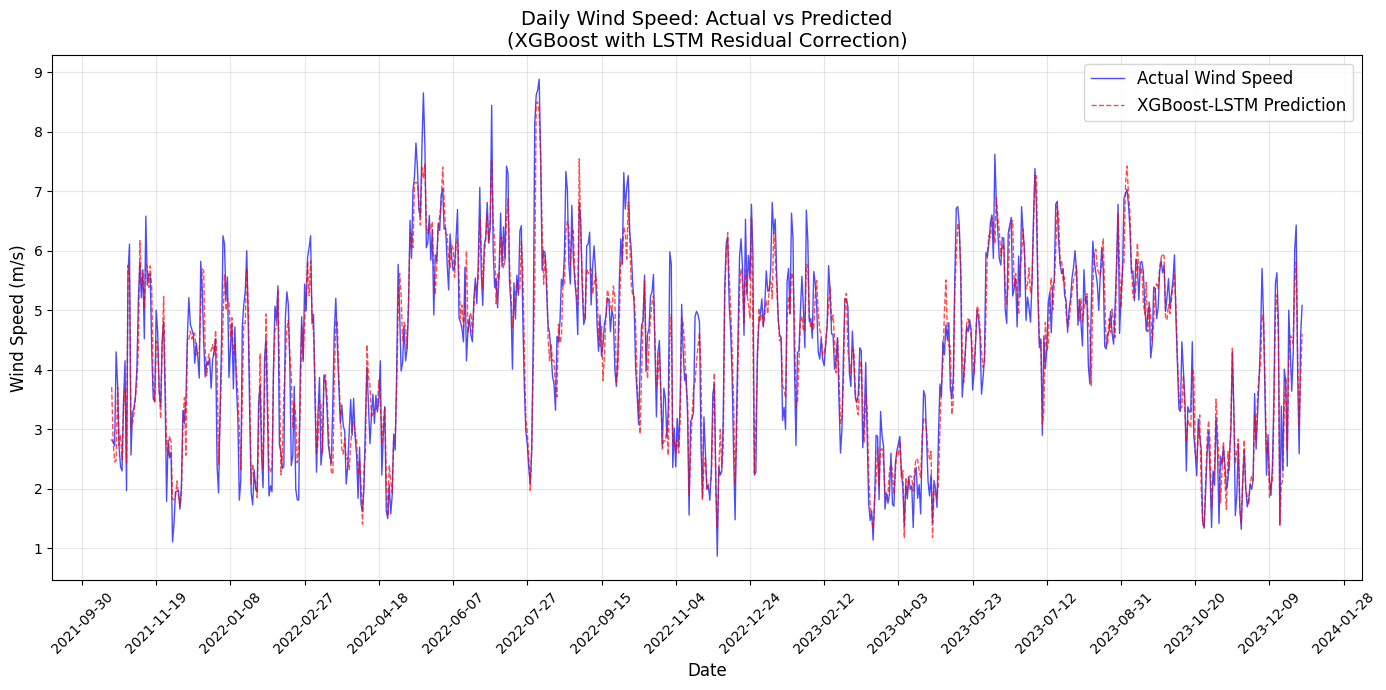

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure proper datetime index (just to be safe)
test_df.index = pd.to_datetime(test_df.index)

# Create figure
plt.figure(figsize=(14, 7))

# Plot with markers to identify individual points
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual Wind Speed',
    color='blue',
    alpha=0.7,
    linewidth=1,
   # marker='o',
   # markersize=4
)

plt.plot(
    test_df.index,
    test_df['XGB_LSTM_Original'],
    label='XGBoost-LSTM Prediction',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1,
    #marker='x',
   # markersize=4
)

# Formatting
plt.title('Daily Wind Speed: Actual vs Predicted\n(XGBoost with LSTM Residual Correction)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Improve x-axis formatting
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Show fewer ticks
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
test_df

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2021-10-20        3.92  84.94     25.38  14.81 -0.914254                0.07   
2021-10-21        2.82  86.10     25.29  33.26 -0.930418                0.01   
2021-10-22        2.79  85.41     24.59   9.53 -0.810042                0.07   
2021-10-23        2.72  85.24     24.52   9.21 -0.570714                0.10   
2021-10-24        4.30  85.16     24.15  10.47 -0.979223               -0.03   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2021-10-20      27.9 -0.405142    83.84                                  0   
2021-10-21      26.7 -0.366501    84.94                                  0   
2021-10-22      28.1 -0.586372    86.10                                  0   
2021-10-23      28.0 -0.821149    85.41                                  0   
2021-10-24      26.6 -0.202787    85.24                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2021-10-20     28.73            1010.8          7.0   2.82   
2021-10-21     28.72            1011.5          7.0   2.79   
2021-10-22     28.80            1011.6          6.0   2.72   
2021-10-23     28.17            1012.0          4.0   4.30   
2021-10-24     27.91            1012.9          7.0   3.74   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  \
Date                                                      
2021-10-20               3.860239             -1.040239   
2021-10-21               2.791685             -0.001685   
2021-10-22               2.620405              0.099595   
2021-10-23               2.522073              1.777927   
2021-10-24               3.884681             -0.144681   
...                           ...                   ...   
2023-12-27               6.052691              0.377309   
2023-12-28               4.319922             -0.389921   
2023-12-29               3.165386             -0.575385   
2023-12-30               3.867595              0.722405   
2023-12-31               4.738072              0.341928   

            predicted_residuals_lstm_original  XGB_LSTM_Original  
Date                                                              
2021-10-20                          -0.152300           3.707939  
2021-10-21                          -0.003538           2.788147  
2021-10-22                          -0.169629           2.450776  
2021-10-23                          -0.042003 

## Grid Search

In [ ]:
df_backup

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            ...  CLOUD_COVER  WS10M  xgb_predictions_WS10M  \
Date        ...                                              
2013-01-03  ...          8.0   4.75               4.515190   
2013-01-04  ...          8.0   5.74               5.659385   
2013-01-05  ...          8.0   5.79               5.869278   
2013-01-06  ...          7.0   4.52               5.049080   
2013-01-07  ...          8.0   4.66               4.724025   
...         ...          ...    ...                    ...   
2023-12-27  ...          5.0   6.43               6.052691   
2023-12-28  ...          7.0   3.93               4.319922   
2023-12-29  ...          7.0   2.59               3.165386   
2023-12-30  ...          6.0   4.59               3.867595   
2023-12-31  ...          6.0   5.08               4.738072   

            ERROR_XGB_PRED_WS10M  predicted_residuals_lstm_original  \
Date                                                                  
2013-01-03              0.234810                           0.086010   
2013-01-04              0.080615                           0.159215   
2013-01-05             -0.079278                           0.097302   
2013-01-06             -0.529080                          -0.081384   
2013-01-07             -0.064025                          -0.083602   
...                          ...                                ...   
2023-12-27              0.377309                          -0.243770   
2023-12-28             -0.389921                          -0.161401   
2023-12-29             -0.575385                          -0.116849   
2023-12-30              0.722405                           0.023512   
2023-12-31              0.341928                          -0.131873   

            XGB_LSTM_Original  predicted_residuals_lstm_random  \
Date                                                             
2013-01-03           4.601199                        -0.012200   
2013-01-04           5.8186

Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters Found:
{'batch_size': 32, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__optimizer': 'rmsprop', 'model__units': 32}

--- LSTM Evaluation (Optimized) ---
Train MSE: 0.1954
Train RMSE: 0.4420
Train MAE: 0.3376
Train MAPE: 177.30%
Train R²: 0.0613
Test MSE: 0.2257
Test RMSE: 0.4751
Test MAE: 0.3545
Test MAPE: 178.54%
Test R²: 0.0069


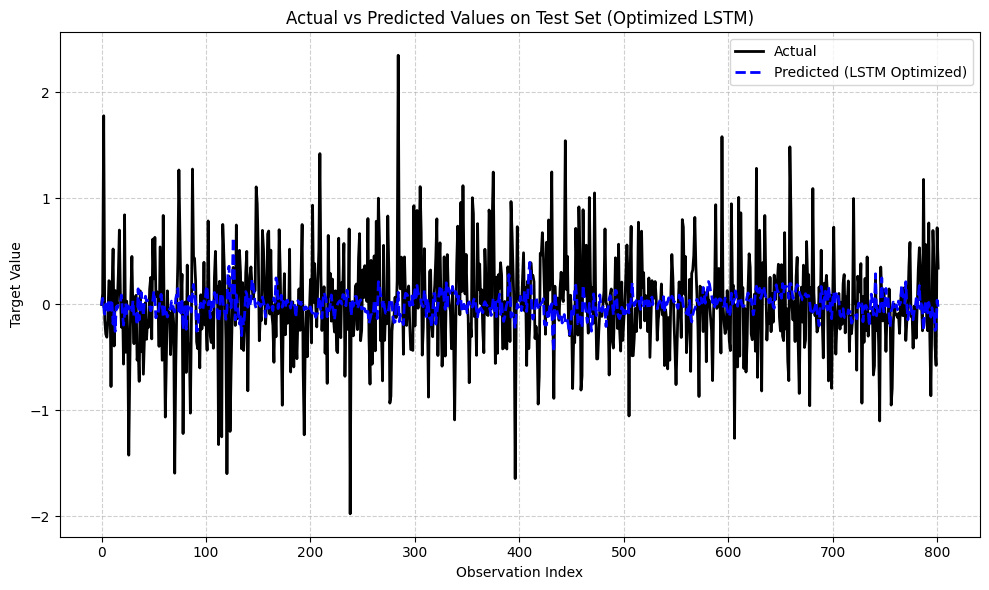

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor

# Set reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# --- Data Scaling (Critical Step) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Reshape for LSTM: (samples, timesteps=1, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)  # Shape: (n_samples, 1, n_features)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Targets as numpy arrays (ensure they are 1D)
y_train_lstm = y_train.values.flatten()
y_test_lstm = y_test.values.flatten()

# Set fixed window size
window_size = 1

def create_sequences(X, y, window_size):
    Xs, ys = [], []
    for i in range(window_size, len(X)):
        Xs.append(X[i - window_size:i])
        ys.append(y.iloc[i])
    return np.array(Xs), np.array(ys)

# Prepare sequences
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, window_size)

# Model builder function
def build_lstm_model(units=64, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, activation='tanh', return_sequences=False, input_shape=(window_size, X_train_seq.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Wrap with KerasRegressor
regressor = KerasRegressor(model=build_lstm_model, verbose=0)

# Define parameter grid
param_grid = {
    "model__units": [32, 64, 128],
    "model__dropout_rate": [0.1, 0.2, 0.3],
    "model__optimizer": ['adam', 'rmsprop'],
    "batch_size": [16, 32],
    "epochs": [50, 100]
}

# Grid search
grid = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit grid search
grid_result = grid.fit(X_train_seq, y_train_seq)

# Best model
best_model = grid_result.best_estimator_

print("\nBest Parameters Found:")
print(grid_result.best_params_)

# Predict
y_train_pred = best_model.predict(X_train_seq).flatten()
y_test_pred = best_model.predict(X_test_seq).flatten()

# Evaluation
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Evaluate
print("\n--- LSTM Evaluation (Optimized) ---")
evaluate_metrics(y_train_seq, y_train_pred, label="Train")
evaluate_metrics(y_test_seq, y_test_pred, label="Test")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (LSTM Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized LSTM)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
df=pd.read_csv('xgb_predictions_and_errors.csv')
df

df = df.set_index('Date')
df
df_backup=df.copy()

In [ ]:
df_backup #4015*16

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  
Date                                                     
2013-01-03               4.515190              0.234810  
2013-01-04               5.659385              0.080615  
2013-01-05               5.869278             -0.079278  
2013-01-06               5.049080             -0.529080  
2013-01-07               4.724025             -0.064025  
...                           ...                   ...  
2023-12-27               6.052691              0.377309  
2023-12-28               4.319922             -0.389921  
2023-12-29               3.165386             -0.575385  
2023-12-30               3.867595              0.722405  
2023-12-31               4.738072              0.341928  

[4015 rows x 16 columns]

In [ ]:

# 2. Scale the full dataset using the same scaler that was fit on training data
X_full_scaled = scaler.transform(X)  # Important: use transform(), not fit_transform()

# 3. Reshape for LSTM
X_full_lstm = np.expand_dims(X_full_scaled, axis=1)  # Shape: (n_samples, 1, n_features)

# 4. Predict residuals using the trained LSTM model
full_pred_residuals_grid = best_model.predict(X_full_lstm).flatten()

# 5. Create a new column in your original dataframe
# (Assuming you have a main dataframe called 'df' that contains all your data)
df['predicted_residuals_lstm_grid'] = full_pred_residuals_grid

# 6. Verify the results
print(df[['predicted_residuals_lstm_grid']].head())

            predicted_residuals_lstm_grid
Date                                     
2013-01-03                       0.098932
2013-01-04                      -0.024624
2013-01-05                      -0.206416
2013-01-06                      -0.126414
2013-01-07                       0.057910


In [ ]:
df

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  \
Date                                                      
2013-01-03               4.515190              0.234810   
2013-01-04               5.659385              0.080615   
2013-01-05               5.869278             -0.079278   
2013-01-06               5.049080             -0.529080   
2013-01-07               4.724025             -0.064025   
...                           ...                   ...   
2023-12-27               6.052691              0.377309   
2023-12-28               4.319922             -0.389921   
2023-12-29               3.165386             -0.575385   
2023-12-30               3.867595              0.722405   
2023-12-31               4.738072              0.341928   

            predicted_residuals_lstm_grid  
Date                                       
2013-01-03                       0.098932  
2013-01-04                      -0.024624  
2013-01-05                      -0.206416  
2013-01-06                      -0.126414  
2013-01-07                       0.057910  
...                                   ...  
2023-12-27                   

In [ ]:
df_backup['predicted_residuals_lstm_grid'] = full_pred_residuals_grid

# 6. Verify the results
print(df_backup[['predicted_residuals_lstm_grid']].head())
df_backup

# XGB_LSTM = xgb_predictions_WS10M + predicted_residuals_lstm
# Add the hybrid predictions (XGBoost + LSTM residuals) to df_backup
df_backup['XGB_LSTM_grid'] = df_backup['xgb_predictions_WS10M'] + df_backup['predicted_residuals_lstm_grid']
df_backup

            predicted_residuals_lstm_grid
Date                                     
2013-01-03                       0.098932
2013-01-04                      -0.024624
2013-01-05                      -0.206416
2013-01-06                      -0.126414
2013-01-07                       0.057910


WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  \
Date                                                      
2013-01-03               4.515190              0.234810   
2013-01-04               5.659385              0.080615   
2013-01-05               5.869278             -0.079278   
2013-01-06               5.049080             -0.529080   
2013-01-07               4.724025             -0.064025   
...                           ...                   ...   
2023-12-27               6.052691              0.377309   
2023-12-28               4.319922             -0.389921   
2023-12-29               3.165386             -0.575385   
2023-12-30               3.867595              0.722405   
2023-12-31               4.738072              0.341928   

            predicted_residuals_lstm_grid  XGB_LSTM_grid  
Date                                                      
2013-01-03                       0.098932       4.614121  
2013-01-04                      -0.024624       5.634761  
2013-01-05                      -0.206416       5.662862  
2013-01-06                      -0.126414       4.922666  
2013-01-07                 

In [ ]:
# Calculate split index (80% for training)
split_idx = int(0.8 * len(df_backup))

# Split into train and test sets
train_df = df_backup.iloc[:split_idx].copy()
test_df = df_backup.iloc[split_idx:].copy()
train_df

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2021-10-15        5.64  87.48     25.75   2.00 -0.865151               -0.21   
2021-10-16        5.84  86.39     25.49   6.33 -0.758134                0.05   
2021-10-17        6.93  87.80     25.93   3.24 -0.915663                0.16   
2021-10-18        6.84  86.68     25.63   3.01 -0.995884                0.18   
2021-10-19        6.13  83.84     24.84   4.97 -0.971549                0.15   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2021-10-15      29.4 -0.501511    87.81                                  0   
2021-10-16      28.1 -0.652098    87.48                                  0   
2021-10-17      28.3 -0.401948    86.39                                  0   
2021-10-18      28.5 -0.090633    87.80                                  0   
2021-10-19      28.4 -0.236838    86.68                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2021-10-15     28.61            1007.1          6.0   5.84   
2021-10-16     28.72            1005.3          6.0   6.93   
2021-10-17     27.85            1006.1          6.0   6.84   
2021-10-18     28.58            1008.2          5.0   6.13   
2021-10-19     28.49            1010.1          6.0   3.92   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  \
Date                                                      
2013-01-03               4.515190              0.234810   
2013-01-04               5.659385              0.080615   
2013-01-05               5.869278             -0.079278   
2013-01-06               5.049080             -0.529080   
2013-01-07               4.724025             -0.064025   
...                           ...                   ...   
2021-10-15               5.803098              0.036902   
2021-10-16               5.559844              1.370156   
2021-10-17               6.711202              0.128798   
2021-10-18               5.962652              0.167348   
2021-10-19               4.929479             -1.009479   

            predicted_residuals_lstm_grid  XGB_LSTM_grid  
Date                                                      
2013-01-03                       0.098932       4.614121  
2013-01-04                      -0.024624       5.634761  
2013-01-05                      -0.206416       5.662862  
2013-01-06                      -0.126414       4.922666  
2013-01-07                 

In [ ]:
test_df

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2021-10-20        3.92  84.94     25.38  14.81 -0.914254                0.07   
2021-10-21        2.82  86.10     25.29  33.26 -0.930418                0.01   
2021-10-22        2.79  85.41     24.59   9.53 -0.810042                0.07   
2021-10-23        2.72  85.24     24.52   9.21 -0.570714                0.10   
2021-10-24        4.30  85.16     24.15  10.47 -0.979223               -0.03   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2021-10-20      27.9 -0.405142    83.84                                  0   
2021-10-21      26.7 -0.366501    84.94                                  0   
2021-10-22      28.1 -0.586372    86.10                                  0   
2021-10-23      28.0 -0.821149    85.41                                  0   
2021-10-24      26.6 -0.202787    85.24                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2021-10-20     28.73            1010.8          7.0   2.82   
2021-10-21     28.72            1011.5          7.0   2.79   
2021-10-22     28.80            1011.6          6.0   2.72   
2021-10-23     28.17            1012.0          4.0   4.30   
2021-10-24     27.91            1012.9          7.0   3.74   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  \
Date                                                      
2021-10-20               3.860239             -1.040239   
2021-10-21               2.791685             -0.001685   
2021-10-22               2.620405              0.099595   
2021-10-23               2.522073              1.777927   
2021-10-24               3.884681             -0.144681   
...                           ...                   ...   
2023-12-27               6.052691              0.377309   
2023-12-28               4.319922             -0.389921   
2023-12-29               3.165386             -0.575385   
2023-12-30               3.867595              0.722405   
2023-12-31               4.738072              0.341928   

            predicted_residuals_lstm_grid  XGB_LSTM_grid  
Date                                                      
2021-10-20                      -0.011324       3.848915  
2021-10-21                       0.057272       2.848957  
2021-10-22                      -0.025928       2.594477  
2021-10-23                      -0.092103       2.429970  
2021-10-24                 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_performance(y_true, y_pred, set_name="Dataset"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {set_name} Metrics ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R²: {r2:.4f}")

    return {
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae,
        'MAPE': mape,
        'R²': r2
    }

In [ ]:
# Evaluate on training set
train_metrics = evaluate_performance(
    train_df['WS10M'],
    train_df['XGB_LSTM_grid'],
    set_name="Train"
)

# Evaluate on test set
test_metrics = evaluate_performance(
    test_df['WS10M'],
    test_df['XGB_LSTM_grid'],
    set_name="Test"
)


--- Train Metrics ---
RMSE: 0.4620
MSE: 0.2134
MAE: 0.3537
MAPE: 9.7985%
R²: 0.9153

--- Test Metrics ---
RMSE: 0.4936
MSE: 0.2436
MAE: 0.3679
MAPE: 9.9063%
R²: 0.8990


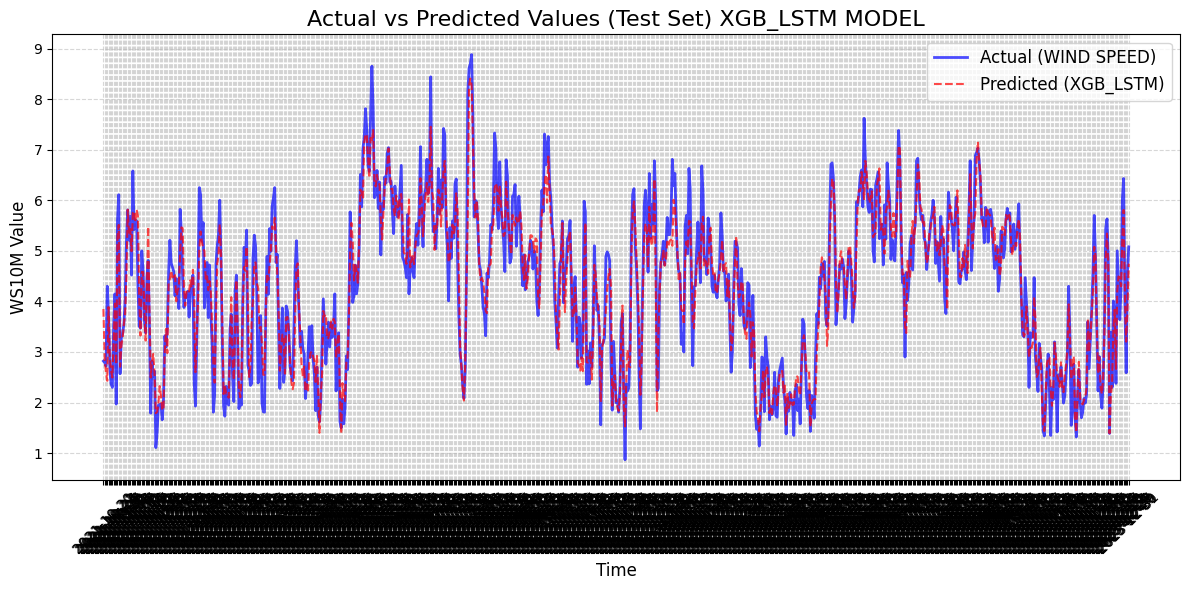

In [ ]:
import matplotlib.pyplot as plt

# Ensure test_df has a datetime index (if applicable)
# If your data has a datetime column (e.g., 'date'), set it as index:
# test_df = test_df.set_index('date')

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual (WIND SPEED)',
    color='blue',
    alpha=0.7,
    linewidth=2
)

# Plot predicted values (XGB_LSTM)
plt.plot(
    test_df.index,
    test_df['XGB_LSTM_grid'],
    label='Predicted (XGB_LSTM)',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1.5
)

# Customize the plot
plt.title('Actual vs Predicted Values (Test Set) XGB_LSTM MODEL', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('WS10M Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels if dates are crowded
plt.xticks(rotation=45)

# Tight layout to avoid label cutoff
plt.tight_layout()
plt.show()

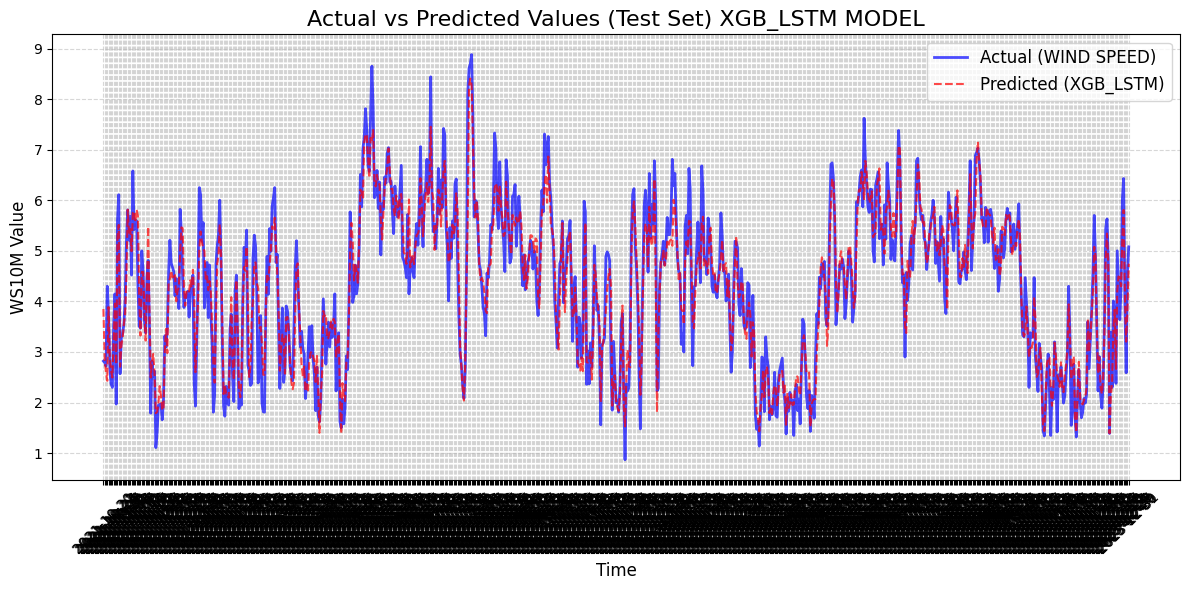

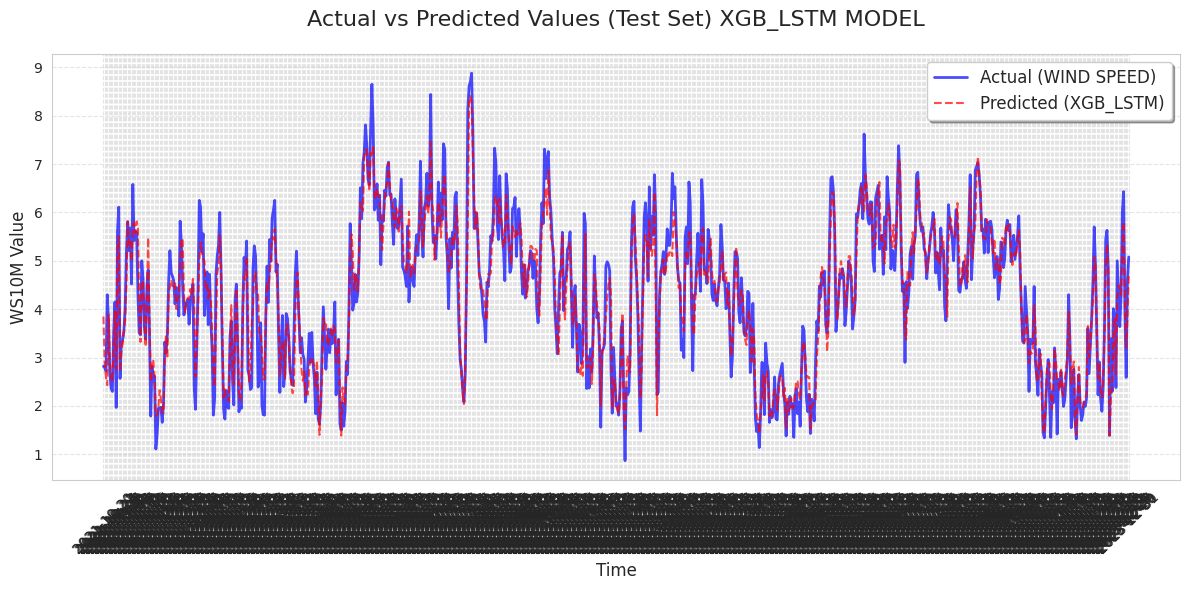

In [ ]:
import matplotlib.pyplot as plt

# Ensure test_df has a datetime index (if applicable)
# If your data has a datetime column (e.g., 'date'), set it as index:
# test_df = test_df.set_index('date')

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual (WIND SPEED)',
    color='blue',
    alpha=0.7,
    linewidth=2
)

# Plot predicted values (XGB_LSTM)
plt.plot(
    test_df.index,
    test_df['XGB_LSTM_grid'],
    label='Predicted (XGB_LSTM)',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1.5
)

# Customize the plot
plt.title('Actual vs Predicted Values (Test Set) XGB_LSTM MODEL', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('WS10M Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels if dates are crowded
plt.xticks(rotation=45)

# Tight layout to avoid label cutoff
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")
sns.set_palette("deep")

# Ensure test_df has a datetime index (if applicable)
# If your data has a datetime column (e.g., 'date'), set it as index:
# test_df = test_df.set_index('date')

plt.figure(figsize=(12, 6))

# Plot actual values (using Seaborn's lineplot for smoother styling)
sns.lineplot(
    x=test_df.index,
    y=test_df['WS10M'],
    label='Actual (WIND SPEED)',
    color='blue',
    alpha=0.7,
    linewidth=2
)

# Plot predicted values (XGB_LSTM) with dashed line
sns.lineplot(
    x=test_df.index,
    y=test_df['XGB_LSTM_grid'],
    label='Predicted (XGB_LSTM)',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1.5
)

# Customize the plot (Matplotlib for fine control)
plt.title('Actual vs Predicted Values (Test Set) XGB_LSTM MODEL', fontsize=16, pad=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('WS10M Value', fontsize=12)
plt.legend(fontsize=12, framealpha=1, shadow=True)
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels if dates are crowded
plt.xticks(rotation=45)

# Tight layout to avoid label cutoff
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df_backup.columns

Index(['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'WS10M',
       'xgb_predictions_WS10M', 'ERROR_XGB_PRED_WS10M',
       'predicted_residuals_lstm_grid', 'XGB_LSTM_grid'],
      dtype='object')

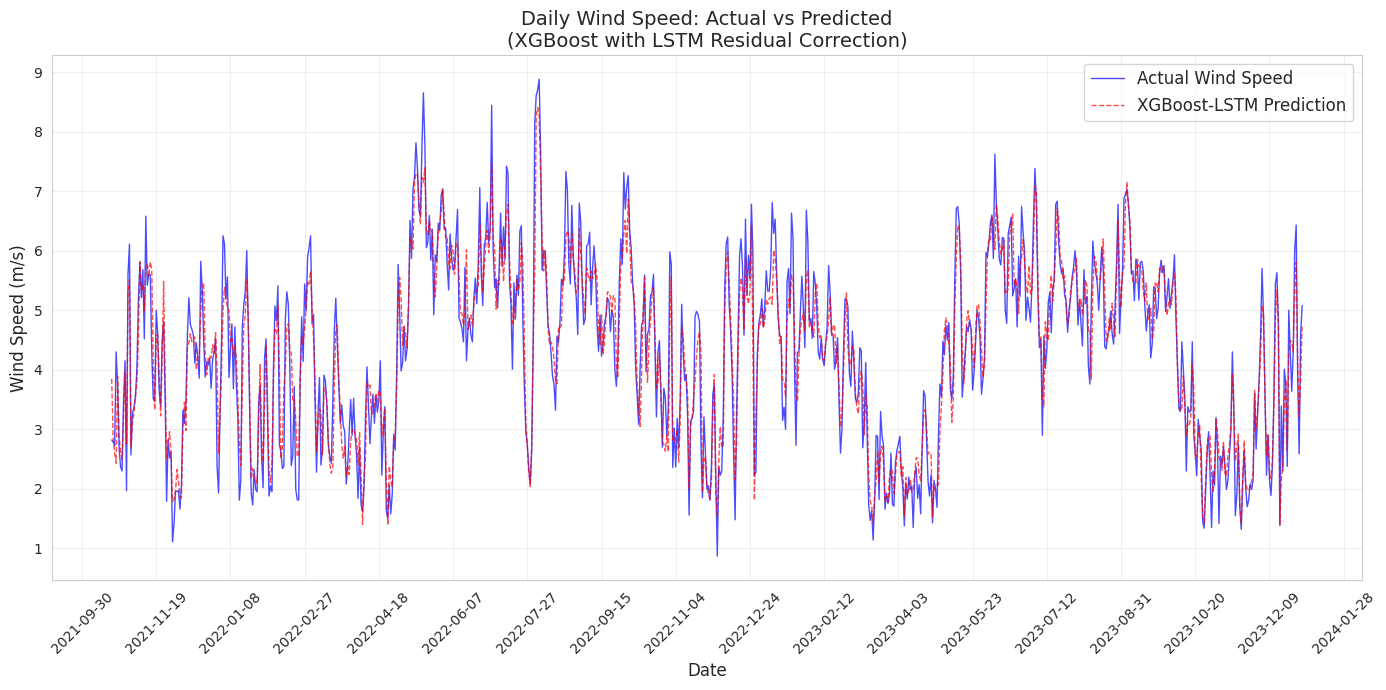

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure proper datetime index (just to be safe)
test_df.index = pd.to_datetime(test_df.index)

# Create figure
plt.figure(figsize=(14, 7))

# Plot with markers to identify individual points
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual Wind Speed',
    color='blue',
    alpha=0.7,
    linewidth=1,
   # marker='o',
   # markersize=4
)

plt.plot(
    test_df.index,
    test_df['XGB_LSTM_grid'],
    label='XGBoost-LSTM Prediction',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1,
    #marker='x',
   # markersize=4
)

# Formatting
plt.title('Daily Wind Speed: Actual vs Predicted\n(XGBoost with LSTM Residual Correction)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Improve x-axis formatting
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Show fewer ticks
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
df_backup
xgb_lstm_df = df_backup[['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'WS10M','XGB_LSTM_grid']]
xgb_lstm_df

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  XGB_LSTM_grid  
Date                                                                       
2013-01-03     28.38            1010.4          8.0   4.75       4.614121  
2013-01-04     27.58            1011.0          8.0   5.74       5.634761  
2013-01-05     26.16            1010.1          8.0   5.79       5.662862  
2013-01-06     27.75            1007.5          7.0   4.52       4.922666  
2013-01-07     26.70            1008.2          8.0   4.66       4.781935  
...              ...               ...          ...    ...            ...  
2023-12-27     30.35            1011.6          5.0   6.43       5.806963  
2023-12-28     29.37            1011.0          7.0   3.93       4.090309  
2023-12-29     29.30            1010.9          7.0   2.59       3.204992  
2023-12-30     29.54            1011.4          6.0   4.59       3.838050  
2023-12-31     30.03            1010.9          6.0   5.08       4.746690  

[4015 rows x 15 columns]

In [ ]:
#save this xgb_lstm_df to csv
xgb_lstm_df.to_csv('xgb_lstm_df_2.csv', index=False)

# optimal among 4 models

## Random Search

In [ ]:
df_backup

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  \
Date                                                      
2013-01-03               4.515190              0.234810   
2013-01-04               5.659385              0.080615   
2013-01-05               5.869278             -0.079278   
2013-01-06               5.049080             -0.529080   
2013-01-07               4.724025             -0.064025   
...                           ...                   ...   
2023-12-27               6.052691              0.377309   
2023-12-28               4.319922             -0.389921   
2023-12-29               3.165386             -0.575385   
2023-12-30               3.867595              0.722405   
2023-12-31               4.738072              0.341928   

            predicted_residuals_lstm_original  XGB_LSTM_Original  
Date                                                              
2013-01-03                           0.086010           4.601199  
2013-01-04                           0.159215           5.818600  
2013-01-05                           0.097302           5.966580  
2013-01-06                          -0.081384 

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END batch_size=54, epochs=101, model__dropout_rate=0.38521429192297485, model__learning_rate=0.006687945476302646, model__units=40; total time=  22.9s
[CV] END batch_size=54, epochs=101, model__dropout_rate=0.38521429192297485, model__learning_rate=0.006687945476302646, model__units=40; total time=  27.0s
[CV] END batch_size=54, epochs=101, model__dropout_rate=0.38521429192297485, model__learning_rate=0.006687945476302646, model__units=40; total time=  37.7s
[CV] END batch_size=54, epochs=132, model__dropout_rate=0.12999247474540088, model__learning_rate=0.004233240027692805, model__units=136; total time=  52.2s
[CV] END batch_size=54, epochs=132, model__dropout_rate=0.12999247474540088, model__learning_rate=0.004233240027692805, model__units=136; total time=  46.9s
[CV] END batch_size=54, epochs=132, model__dropout_rate=0.12999247474540088, model__learning_rate=0.004233240027692805, model__units=136; total time=  57.5s


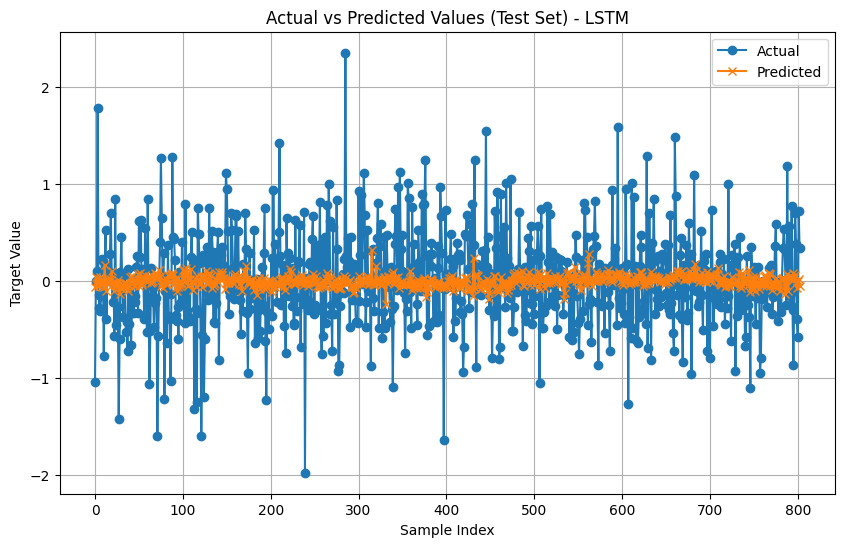

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor

from tensorflow.keras.optimizers import Adam

# Fix random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
import tensorflow as tf
tf.random.set_seed(RANDOM_SEED)
# --- Data Scaling (Critical Step) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Reshape for LSTM: (samples, timesteps=1, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)  # Shape: (n_samples, 1, n_features)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Targets as numpy arrays (ensure they are 1D)
y_train_lstm = y_train.values.flatten()
y_test_lstm = y_test.values.flatten()

# Prepare data for LSTM: reshape to 3D (samples, timesteps=1, features)
#X_train_lstm = X_train_sub.values.reshape((X_train_sub.shape[0], 1, X_train_sub.shape[1]))
#X_test_lstm = X_test_sub.values.reshape((X_test_sub.shape[0], 1, X_test_sub.shape[1]))

# Define function to create model (required for KerasRegressor)
def create_lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, X_train.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Regression output
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Wrap Keras model for sklearn
from scikeras.wrappers import KerasRegressor
from scipy.stats import randint, uniform

# Wrap the model using scikeras
lstm_regressor = KerasRegressor(model=create_lstm_model, verbose=0)

# Define parameter distribution with correct scikeras syntax
param_dist = {
    'model__units': randint(20, 151),
    'model__dropout_rate': uniform(0.1, 0.3),
    'model__learning_rate': uniform(1e-4, 9e-3),
    'batch_size': randint(16, 65),
    'epochs': randint(50, 151)
}

# Define parameter grid for Randomized Search (except window length)
from scipy.stats import randint, uniform


# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lstm_regressor,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    random_state=RANDOM_SEED,
    verbose=2,
    n_jobs=1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_lstm, y_train)

# Best params
print("Best Hyperparameters:", random_search.best_params_)

# Predict on train and test sets using best estimator
y_train_pred_lstm = random_search.predict(X_train_lstm)
y_test_pred_lstm = random_search.predict(X_test_lstm)


print("\n--- LSTM Evaluation ---")
evaluate(y_train, y_train_pred_lstm, label="Train (LSTM)")
evaluate(y_test, y_test_pred_lstm, label="Test (LSTM)")

# Create a DataFrame to compare actual and predicted values on test set
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_lstm
})

print(comparison_df.head(20))

# Plot actual vs predicted for test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_test_pred_lstm, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (Test Set) - LSTM')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_backup

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  \
Date                                                      
2013-01-03               4.515190              0.234810   
2013-01-04               5.659385              0.080615   
2013-01-05               5.869278             -0.079278   
2013-01-06               5.049080             -0.529080   
2013-01-07               4.724025             -0.064025   
...                           ...                   ...   
2023-12-27               6.052691              0.377309   
2023-12-28               4.319922             -0.389921   
2023-12-29               3.165386             -0.575385   
2023-12-30               3.867595              0.722405   
2023-12-31               4.738072              0.341928   

            predicted_residuals_lstm_original  XGB_LSTM_Original  
Date                                                              
2013-01-03                           0.086010           4.601199  
2013-01-04                           0.159215           5.818600  
2013-01-05                           0.097302           5.966580  
2013-01-06                          -0.081384 

            predicted_residuals_lstm_random
Date                                       
2013-01-03                        -0.012200
2013-01-04                        -0.015086
2013-01-05                        -0.106585
2013-01-06                        -0.049544
2013-01-07                        -0.033990
            predicted_residuals_lstm_random
Date                                       
2013-01-03                        -0.012200
2013-01-04                        -0.015086
2013-01-05                        -0.106585
2013-01-06                        -0.049544
2013-01-07                        -0.033990

--- Train Metrics ---
RMSE: 0.4496
MSE: 0.2021
MAE: 0.3428
MAPE: 9.4581%
R²: 0.9198

--- Test Metrics ---
RMSE: 0.4787
MSE: 0.2291
MAE: 0.3563
MAPE: 9.5244%
R²: 0.9050


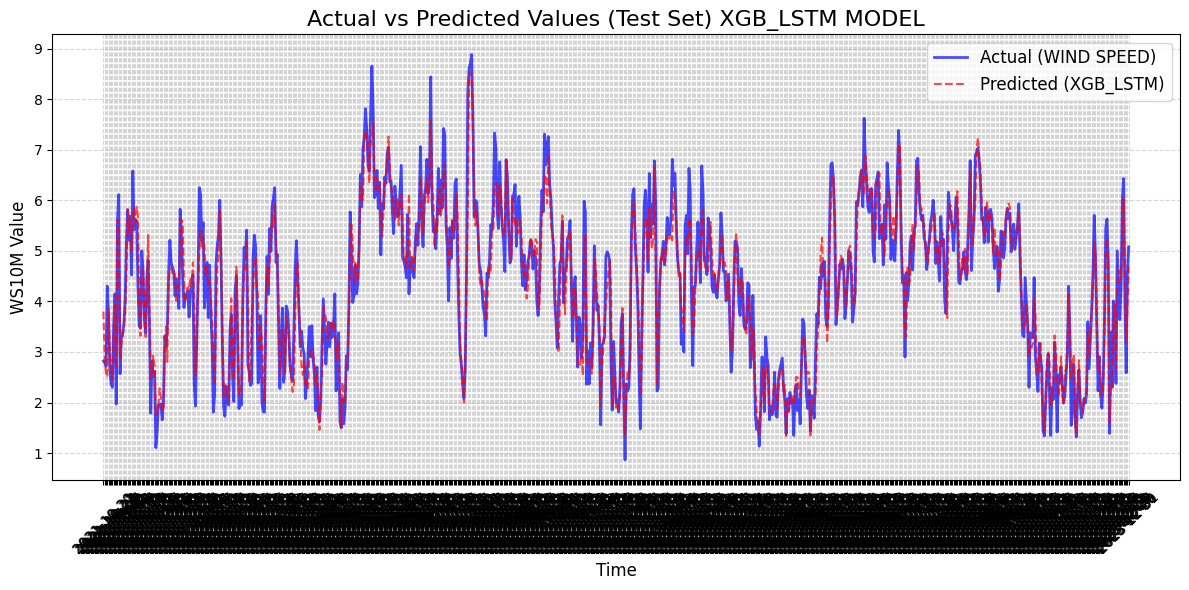

In [ ]:

# 2. Scale the full dataset using the same scaler that was fit on training data
X_full_scaled = scaler.transform(X)  # Important: use transform(), not fit_transform()

# 3. Reshape for LSTM
X_full_lstm = np.expand_dims(X_full_scaled, axis=1)  # Shape: (n_samples, 1, n_features)

# 4. Predict residuals using the trained LSTM model
full_pred_residuals_random = random_search.predict(X_full_lstm).flatten()

# 5. Create a new column in your original dataframe
# (Assuming you have a main dataframe called 'df' that contains all your data)
df['predicted_residuals_lstm_random'] = full_pred_residuals_random

# 6. Verify the results
print(df[['predicted_residuals_lstm_random']].head())
df
df_backup['predicted_residuals_lstm_random'] = full_pred_residuals_random

# 6. Verify the results
print(df_backup[['predicted_residuals_lstm_random']].head())
df_backup

# XGB_LSTM = xgb_predictions_WS10M + predicted_residuals_lstm
# Add the hybrid predictions (XGBoost + LSTM residuals) to df_backup
df_backup['XGB_LSTM_random'] = df_backup['xgb_predictions_WS10M'] + df_backup['predicted_residuals_lstm_random']
df_backup
# Calculate split index (80% for training)
split_idx = int(0.8 * len(df_backup))

# Split into train and test sets
train_df = df_backup.iloc[:split_idx].copy()
test_df = df_backup.iloc[split_idx:].copy()
train_df
test_df
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_performance(y_true, y_pred, set_name="Dataset"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {set_name} Metrics ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R²: {r2:.4f}")

    return {
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae,
        'MAPE': mape,
        'R²': r2
    }
# Evaluate on training set
train_metrics = evaluate_performance(
    train_df['WS10M'],
    train_df['XGB_LSTM_random'],
    set_name="Train"
)

# Evaluate on test set
test_metrics = evaluate_performance(
    test_df['WS10M'],
    test_df['XGB_LSTM_random'],
    set_name="Test"
)
import matplotlib.pyplot as plt

# Ensure test_df has a datetime index (if applicable)
# If your data has a datetime column (e.g., 'date'), set it as index:
# test_df = test_df.set_index('date')

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual (WIND SPEED)',
    color='blue',
    alpha=0.7,
    linewidth=2
)

# Plot predicted values (XGB_LSTM)
plt.plot(
    test_df.index,
    test_df['XGB_LSTM_random'],
    label='Predicted (XGB_LSTM)',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1.5
)

# Customize the plot
plt.title('Actual vs Predicted Values (Test Set) XGB_LSTM MODEL', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('WS10M Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels if dates are crowded
plt.xticks(rotation=45)

# Tight layout to avoid label cutoff
plt.tight_layout()
plt.show()
df_backup.columns
df_backup
xgb_lstm_random_df = df_backup[['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'WS10M','XGB_LSTM_random']]
xgb_lstm_random_df
#save this xgb_lstm_df to csv
xgb_lstm_random_df.to_csv('xgb_lstm_df_random.csv', index=False)


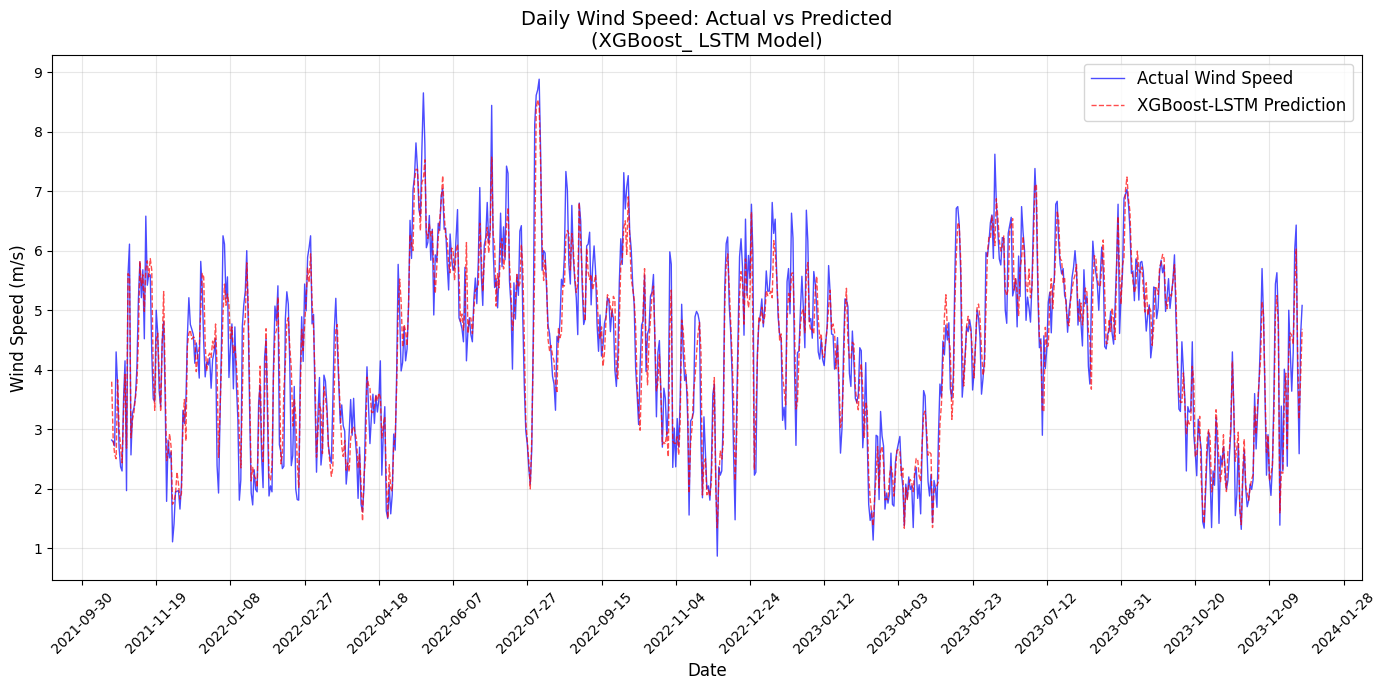

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure proper datetime index (just to be safe)
test_df.index = pd.to_datetime(test_df.index)

# Create figure
plt.figure(figsize=(14, 7))

# Plot with markers to identify individual points
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual Wind Speed',
    color='blue',
    alpha=0.7,
    linewidth=1,
   # marker='o',
   # markersize=4
)

plt.plot(
    test_df.index,
    test_df['XGB_LSTM_random'],
    label='XGBoost-LSTM Prediction',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1,
    #marker='x',
   # markersize=4
)

# Formatting
plt.title('Daily Wind Speed: Actual vs Predicted\n(XGBoost_ LSTM Model)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Improve x-axis formatting
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Show fewer ticks
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## optuna

In [ ]:
df_backup

WS10M_lag1     RH  MIN_TEMP   PREC    WD_sin  SURF_PRESSURE_DIFF  \
Date                                                                           
2013-01-03        4.25  86.26     23.42  13.42  0.439939                0.03   
2013-01-04        4.75  86.31     22.93   8.79  0.424199               -0.03   
2013-01-05        5.74  86.88     22.17   2.60  0.563526               -0.15   
2013-01-06        5.79  88.09     23.47   1.65  0.460200               -0.03   
2013-01-07        4.52  93.04     24.04  27.41  0.368125               -0.01   
...                ...    ...       ...    ...       ...                 ...   
2023-12-27        6.01  88.57     24.40   9.45  0.381070               -0.09   
2023-12-28        6.43  90.59     25.51  13.93  0.634731               -0.08   
2023-12-29        3.93  89.03     25.03   9.80  0.689620                0.11   
2023-12-30        2.59  87.47     24.71   9.98  0.564967               -0.02   
2023-12-31        4.59  86.37     24.10  14.96  0.569280                0.02   

            AVG_TEMP    WD_cos  RH_lag1  MONOSOON_SEASON_Southwest_Monsoon  \
Date                                                                         
2013-01-03      26.4  0.898028    86.19                                  0   
2013-01-04      25.1  0.905569    86.26                                  0   
2013-01-05      26.9  0.826098    86.31                                  0   
2013-01-06      27.3  0.887815    86.88                                  0   
2013-01-07      25.9  0.929776    88.09                                  0   
...              ...       ...      ...                                ...   
2023-12-27      29.5  0.924546    86.27                                  0   
2023-12-28      28.5  0.772734    88.57                                  0   
2023-12-29      28.2  0.724172    90.59                                  0   
2023-12-30      28.4  0.825113    89.03                                  0   
2023-12-31      28.6  0.822144    87.47                                  0   

            MAX_TEMP  SL_PRESSURE_lag1  CLOUD_COVER  WS10M  \
Date                                                         
2013-01-03     28.38            1010.4          8.0   4.75   
2013-01-04     27.58            1011.0          8.0   5.74   
2013-01-05     26.16            1010.1          8.0   5.79   
2013-01-06     27.75            1007.5          7.0   4.52   
2013-01-07     26.70            1008.2          8.0   4.66   
...              ...               ...          ...    ...   
2023-12-27     30.35            1011.6          5.0   6.43   
2023-12-28     29.37            1011.0          7.0   3.93   
2023-12-29     29.30            1010.9          7.0   2.59   
2023-12-30     29.54            1011.4          6.0   4.59   
2023-12-31     30.03            1010.9          6.0   5.08   

            xgb_predictions_WS10M  ERROR_XGB_PRED_WS10M  \
Date                                                      
2013-01-03               4.515190              0.234810   
2013-01-04               5.659385              0.080615   
2013-01-05               5.869278             -0.079278   
2013-01-06               5.049080             -0.529080   
2013-01-07               4.724025             -0.064025   
...                           ...                   ...   
2023-12-27               6.052691              0.377309   
2023-12-28               4.319922             -0.389921   
2023-12-29               3.165386             -0.575385   
2023-12-30               3.867595              0.722405   
2023-12-31               4.738072              0.341928   

            predicted_residuals_lstm_original  XGB_LSTM_Original  \
Date                                                               
2013-01-03                           0.086010           4.601199   
2013-01-04                           0.159215           5.818600   
2013-01-05                           0.097302           5.966580   
2013-01-06                          -0.08

[I 2025-07-24 08:19:35,093] A new study created in memory with name: no-name-2fe91cf0-a9bb-49a6-b264-2eb399c41244


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-24 08:22:44,895] Trial 0 finished with value: 0.21608275124047802 and parameters: {'batch_size': 32, 'epochs': 110, 'units': 40, 'dropout_rate': 0.16239780813448107, 'learning_rate': 0.00013066739238053285}. Best is trial 0 with value: 0.21608275124047802.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-24 08:25:59,756] Trial 1 finished with value: 0.21713622129704974 and parameters: {'batch_size': 16, 'epochs': 52, 'units': 147, 'dropout_rate': 0.4329770563201687, 'learning_rate': 0.00026587543983272726}. Best is trial 0 with value: 0.21608275124047802.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[I 2025-07-24 08:28:02,815] Trial 2 finished with value: 0.248616757237969 and parameters: {'batch_size': 64, 'epochs': 103, 'units': 76, 'dropout_rate': 0.21649165607921678, 'learning_rate': 0.0016738085788752138}. Best is trial 0 with value: 0.21608275124047802.


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-07-24 08:30:15,759] Trial 3 finished with value: 0.23491661023204885 and parameters: {'batch_size': 64, 'epochs': 96, 'units': 122, 'dropout_rate': 0.1798695128633439, 'learning_rate': 0.0010677482709481358}. Best is trial 0 with value: 0.21608275124047802.



Best Trial:
FrozenTrial(number=0, state=1, values=[0.21608275124047802], datetime_start=datetime.datetime(2025, 7, 24, 8, 19, 35, 96124), datetime_complete=datetime.datetime(2025, 7, 24, 8, 22, 44, 894940), params={'batch_size': 32, 'epochs': 110, 'units': 40, 'dropout_rate': 0.16239780813448107, 'learning_rate': 0.00013066739238053285}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'batch_size': CategoricalDistribution(choices=(16, 32, 64)), 'epochs': IntDistribution(high=150, log=False, low=50, step=1), 'units': IntDistribution(high=150, log=False, low=20, step=1), 'dropout_rate': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'learning_rate': FloatDistribution(high=0.01, log=True, low=0.0001, step=None)}, trial_id=0, value=None)

Best Parameters:
{'batch_size': 32, 'epochs': 110, 'units': 40, 'dropout_rate': 0.16239780813448107, 'learning_rate': 0.00013066739238053285}
Epoch 1/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2312
Epoch 2/

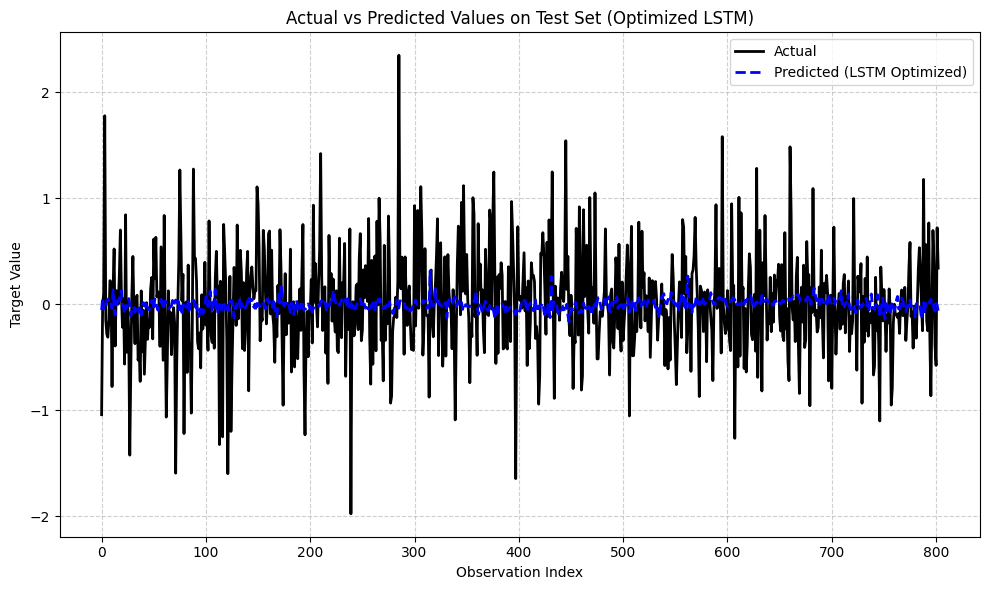

In [ ]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# --- Data Scaling (Critical Step) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit ONLY on training data
X_test_scaled = scaler.transform(X_test)      # Apply same scaling to test data

# Reshape for LSTM: (samples, timesteps=1, features)
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)  # Shape: (n_samples, 1, n_features)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Targets as numpy arrays (ensure they are 1D)
y_train_lstm = y_train.values.flatten()
y_test_lstm = y_test.values.flatten()

# Fix random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Reshape input for LSTM: (samples, timesteps=1, features)
#X_train_lstm = X_train_sub.values.reshape((X_train_sub.shape[0], 1, X_train_sub.shape[1]))
#X_test_lstm = X_test_sub.values.reshape((X_test_sub.shape[0], 1, X_test_sub.shape[1]))

# Evaluation function (same as you used)
def evaluate_metrics(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"{label} MSE: {mse:.4f}")
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} MAE: {mae:.4f}")
    print(f"{label} MAPE: {mape:.2f}%")
    print(f"{label} R²: {r2:.4f}")
    return mse, rmse, mae, mape, r2

# Build LSTM model function for Optuna
def create_lstm_model(trial):
    units = trial.suggest_int('units', 20, 150)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)

    model = Sequential()
    model.add(LSTM(units=units, input_shape=(1, X_train.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Regression output
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Optuna objective for LSTM
def lstm_objective(trial):
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    epochs = trial.suggest_int('epochs', 50, 150)

    model = create_lstm_model(trial)

    tscv = TimeSeriesSplit(n_splits=5)
    rmse_scores = []

    for train_idx, val_idx in tscv.split(X_train_lstm):
        X_t, X_v = X_train_lstm[train_idx], X_train_lstm[val_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

        history = model.fit(
            X_t, y_t,
            validation_data=(X_v, y_v),
            epochs=epochs,
            batch_size=batch_size,
            verbose=0,
            shuffle=False
        )
        preds = model.predict(X_v).flatten()
        rmse = mean_squared_error(y_v, preds)
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Create and run Optuna study
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED))
study.optimize(lstm_objective, n_trials=30, timeout=600)

print("\nBest Trial:")
print(study.best_trial)
print("\nBest Parameters:")
print(study.best_params)

# Refit final model on full train data with best params
best_params = study.best_params

final_model = Sequential()
final_model.add(LSTM(units=best_params['units'], input_shape=(1, X_train.shape[1])))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1))
optimizer = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(loss='mse', optimizer=optimizer)

final_model.fit(
    X_train_lstm, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1,
    shuffle=False
)

# Predict
y_train_pred = final_model.predict(X_train_lstm).flatten()
y_test_pred = final_model.predict(X_test_lstm).flatten()

print("\n--- Optimized LSTM Evaluation ---")
evaluate_metrics(y_train, y_train_pred, label="Train (LSTM Optimized)")
evaluate_metrics(y_test, y_test_pred, label="Test (LSTM Optimized)")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (LSTM Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized LSTM)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Epoch 1/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2145
Epoch 2/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2137
Epoch 3/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2145
Epoch 4/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2105
Epoch 5/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2102
Epoch 6/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2101
Epoch 7/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2075
Epoch 8/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2087
Epoch 9/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2085
Epoch 10/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2093
Epoch 11/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2084
Epoch 12/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2091
Epoch 13/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2080
Epoch 14/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2057
Epoch 15/110
101/101 ━━━━━━━━━━━━━━━━━━━━ 0

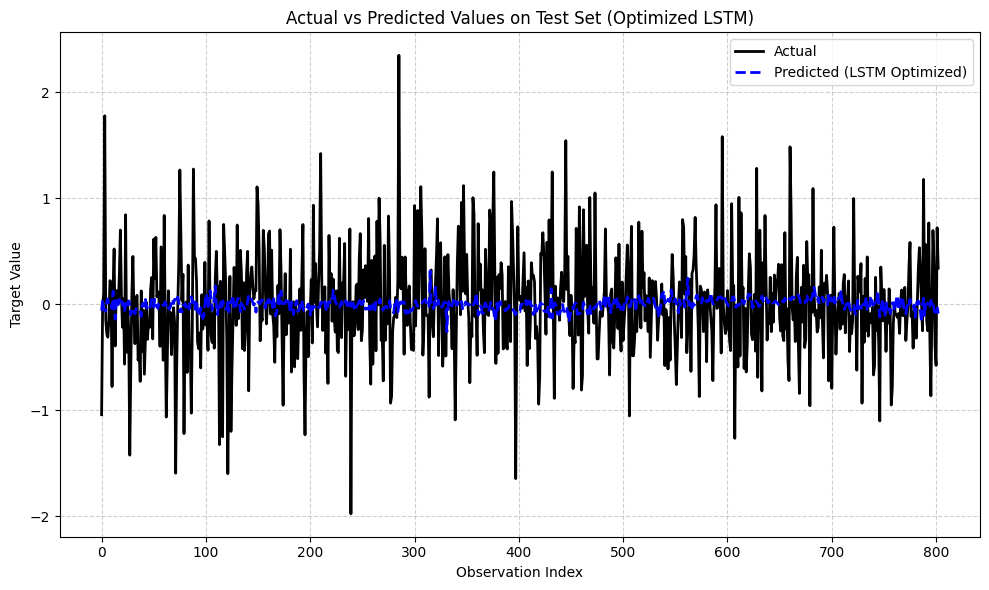

In [ ]:

# Refit final model on full train data with best params
best_params = study.best_params

final_model = Sequential()
final_model.add(LSTM(units=best_params['units'], input_shape=(1, X_train.shape[1])))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1))
optimizer = Adam(learning_rate=best_params['learning_rate'])
final_model.compile(loss='mse', optimizer=optimizer)

final_model.fit(
    X_train_lstm, y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1,
    shuffle=False
)

# Predict
y_train_pred = final_model.predict(X_train_lstm).flatten()
y_test_pred = final_model.predict(X_test_lstm).flatten()

print("\n--- Optimized LSTM Evaluation ---")
evaluate_metrics(y_train, y_train_pred, label="Train (LSTM Optimized)")
evaluate_metrics(y_test, y_test_pred, label="Test (LSTM Optimized)")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2)
plt.plot(y_test_pred, label='Predicted (LSTM Optimized)', color='blue', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values on Test Set (Optimized LSTM)')
plt.xlabel('Observation Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
            predicted_residuals_lstm_optuna
Date                                       
2013-01-03                        -0.019944
2013-01-04                        -0.003963
2013-01-05                        -0.051754
2013-01-06                        -0.039586
2013-01-07                        -0.044481
            predicted_residuals_lstm_optuna
Date                                       
2013-01-03                        -0.019944
2013-01-04                        -0.003963
2013-01-05                        -0.051754
2013-01-06                        -0.039586
2013-01-07                        -0.044481

--- Train Metrics ---
RMSE: 0.4500
MSE: 0.2025
MAE: 0.3426
MAPE: 9.4465%
R²: 0.9196

--- Test Metrics ---
RMSE: 0.4788
MSE: 0.2292
MAE: 0.3560
MAPE: 9.5134%
R²: 0.9049


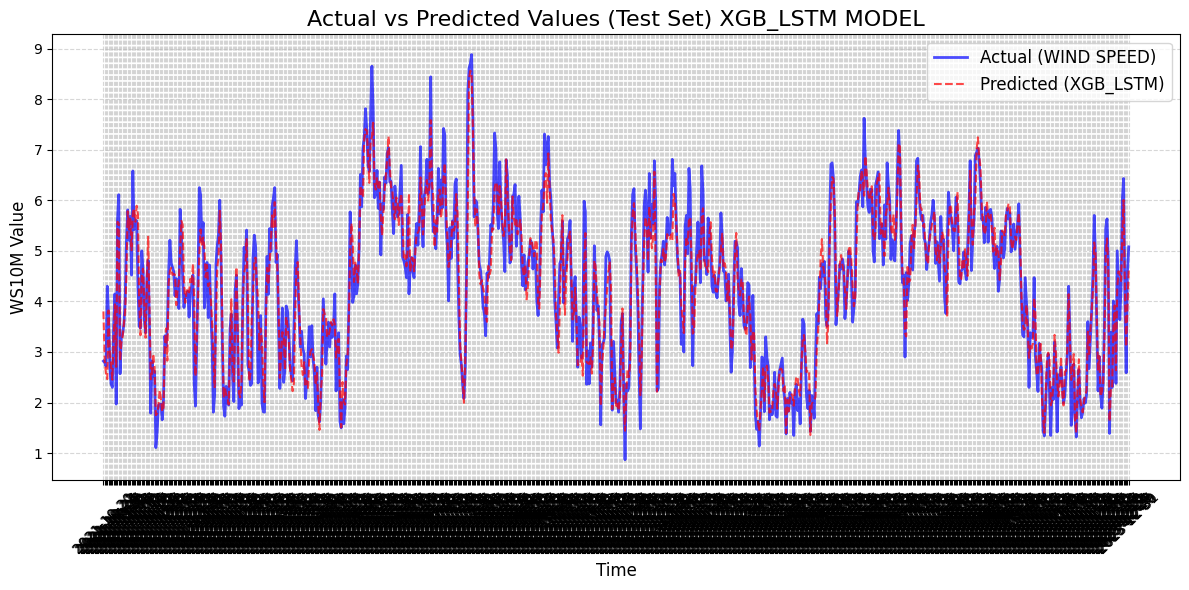

In [ ]:

# 2. Scale the full dataset using the same scaler that was fit on training data
X_full_scaled = scaler.transform(X)  # Important: use transform(), not fit_transform()

# 3. Reshape for LSTM
X_full_lstm = np.expand_dims(X_full_scaled, axis=1)  # Shape: (n_samples, 1, n_features)

# 4. Predict residuals using the trained LSTM model
full_pred_residuals_optuna = final_model.predict(X_full_lstm).flatten()

# 5. Create a new column in your original dataframe
# (Assuming you have a main dataframe called 'df' that contains all your data)
df['predicted_residuals_lstm_optuna'] = full_pred_residuals_optuna

# 6. Verify the results
print(df[['predicted_residuals_lstm_optuna']].head())
df
df_backup['predicted_residuals_lstm_optuna'] = full_pred_residuals_optuna

# 6. Verify the results
print(df_backup[['predicted_residuals_lstm_optuna']].head())
df_backup

# XGB_LSTM = xgb_predictions_WS10M + predicted_residuals_lstm
# Add the hybrid predictions (XGBoost + LSTM residuals) to df_backup
df_backup['XGB_LSTM_optuna'] = df_backup['xgb_predictions_WS10M'] + df_backup['predicted_residuals_lstm_optuna']
df_backup
# Calculate split index (80% for training)
split_idx = int(0.8 * len(df_backup))

# Split into train and test sets
train_df = df_backup.iloc[:split_idx].copy()
test_df = df_backup.iloc[split_idx:].copy()
train_df
test_df
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_performance(y_true, y_pred, set_name="Dataset"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {set_name} Metrics ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"R²: {r2:.4f}")

    return {
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae,
        'MAPE': mape,
        'R²': r2
    }
# Evaluate on training set
train_metrics = evaluate_performance(
    train_df['WS10M'],
    train_df['XGB_LSTM_optuna'],
    set_name="Train"
)

# Evaluate on test set
test_metrics = evaluate_performance(
    test_df['WS10M'],
    test_df['XGB_LSTM_optuna'],
    set_name="Test"
)
import matplotlib.pyplot as plt

# Ensure test_df has a datetime index (if applicable)
# If your data has a datetime column (e.g., 'date'), set it as index:
# test_df = test_df.set_index('date')

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual (WIND SPEED)',
    color='blue',
    alpha=0.7,
    linewidth=2
)

# Plot predicted values (XGB_LSTM)
plt.plot(
    test_df.index,
    test_df['XGB_LSTM_optuna'],
    label='Predicted (XGB_LSTM)',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1.5
)

# Customize the plot
plt.title('Actual vs Predicted Values (Test Set) XGB_LSTM MODEL', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('WS10M Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Rotate x-axis labels if dates are crowded
plt.xticks(rotation=45)

# Tight layout to avoid label cutoff
plt.tight_layout()
plt.show()
df_backup.columns
df_backup
xgb_lstm_optuna_df = df_backup[['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'WS10M','XGB_LSTM_optuna']]
xgb_lstm_optuna_df
#save this xgb_lstm_df to csv
xgb_lstm_optuna_df.to_csv('xgb_lstm_df_optuna.csv', index=False)


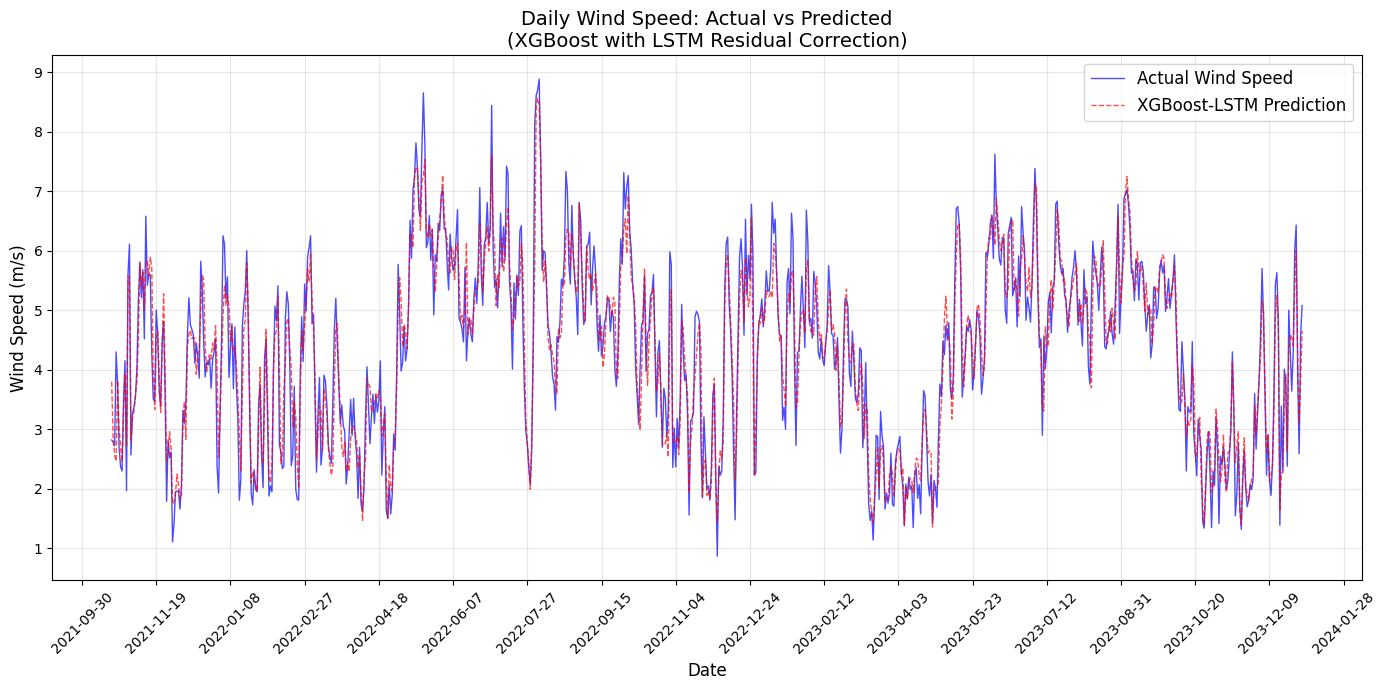

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure proper datetime index (just to be safe)
test_df.index = pd.to_datetime(test_df.index)

# Create figure
plt.figure(figsize=(14, 7))

# Plot with markers to identify individual points
plt.plot(
    test_df.index,
    test_df['WS10M'],
    label='Actual Wind Speed',
    color='blue',
    alpha=0.7,
    linewidth=1,
   # marker='o',
   # markersize=4
)

plt.plot(
    test_df.index,
    test_df['XGB_LSTM_optuna'],
    label='XGBoost-LSTM Prediction',
    color='red',
    linestyle='--',
    alpha=0.7,
    linewidth=1,
    #marker='x',
   # markersize=4
)

# Formatting
plt.title('Daily Wind Speed: Actual vs Predicted\n(XGBoost with LSTM Residual Correction)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Improve x-axis formatting
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))  # Show fewer ticks
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
df_backup.columns

Index(['WS10M_lag1', 'RH', 'MIN_TEMP', 'PREC', 'WD_sin', 'SURF_PRESSURE_DIFF',
       'AVG_TEMP', 'WD_cos', 'RH_lag1', 'MONOSOON_SEASON_Southwest_Monsoon',
       'MAX_TEMP', 'SL_PRESSURE_lag1', 'CLOUD_COVER', 'WS10M',
       'xgb_predictions_WS10M', 'ERROR_XGB_PRED_WS10M',
       'predicted_residuals_lstm_grid', 'XGB_LSTM_grid'],
      dtype='object')